In [1]:
import pandas as pd

Считать данные с помощью pandas\
Вывести на экран первые 5 строк

In [2]:
df = pd.read_csv('laptop_price.csv', sep=',', encoding='Windows-1251')
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


1.1 Изучите количество памяти с помощью matplotlib

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

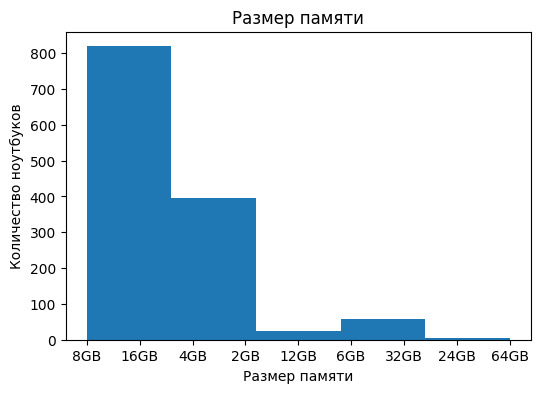

In [7]:
plt.figure(figsize=(6, 4))

plt.hist(df['Ram'], bins=5)
plt.title('Размер памяти')
plt.xlabel('Размер памяти')
plt.ylabel('Количество ноутбуков');


1.2 Изучите стоимость ноутбуков с помощью matplotlib

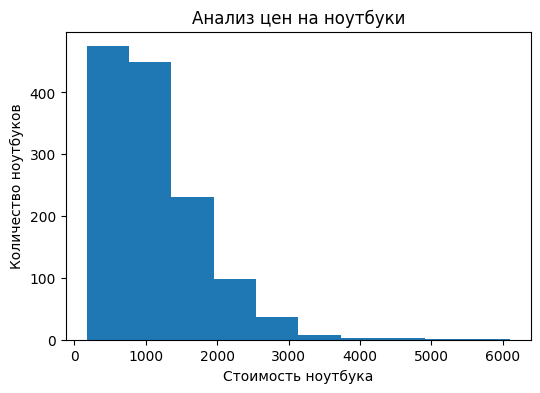

In [18]:
plt.figure(figsize=(6, 4))

plt.hist(df['Price_euros'])
plt.title('Анализ цен на ноутбуки')
plt.xlabel('Стоимость ноутбука')
plt.ylabel('Количество ноутбуков');

1.3 Изучите вес ноутбуков с помощью matplotlib

In [14]:
df['Weight'] = df['Weight'].str.replace('kg','')
df['Weight'] = df['Weight'].astype(float)

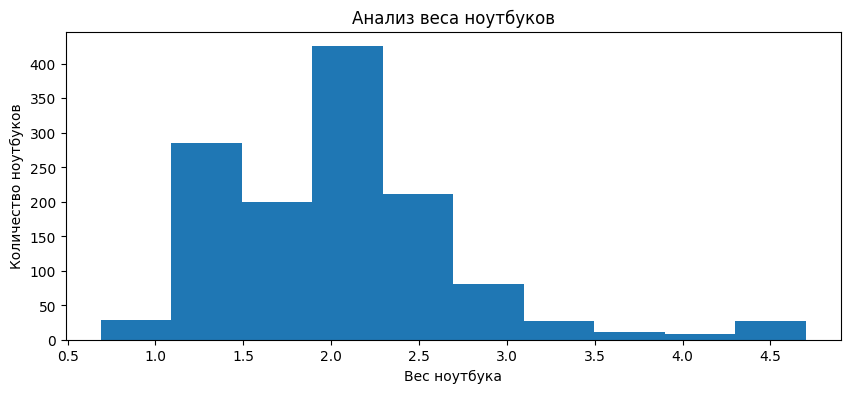

In [17]:
plt.figure(figsize=(10, 4))

plt.hist(df['Weight'], bins=10)
plt.title('Анализ веса ноутбуков')
plt.xlabel('Вес ноутбука')
plt.ylabel('Количество ноутбуков');

In [20]:
df = pd.read_csv('laptops_10.csv', sep=',', encoding='Windows-1251')
df.head()

,Company,Product,TypeName,Inches,Cpu,Ram,Gpu,OpSys,Weight,Price_euros,Cpu_Company,Memory_Amount,Memory_Type
0,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5 2.3GHz,8GB,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,Intel,128,SSD
1,Apple,Macbook Air,Ultrabook,13.3,Intel Core i5 1.8GHz,8GB,Intel HD Graphics 6000,macOS,1.34,898.94,Intel,128,FlashStorage
2,HP,250 G6,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8GB,Intel HD Graphics 620,No OS,1.86,575.00,Intel,256,SSD
3,Apple,MacBook Pro,Ultrabook,15.4,Intel Core i7 2.7GHz,16GB,AMD Radeon Pro 455,macOS,1.83,2537.45,Intel,512,SSD
4,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5 3.1GHz,8GB,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,Intel,256,SSD


2.1 Изучите распределение типов носителя. Используем pie

In [22]:
data = df['Memory_Type'].value_counts()
data



Memory_Type
SSD             641
HDD             576
FlashStorage     74
Hybrid           12
Name: count, dtype: int64

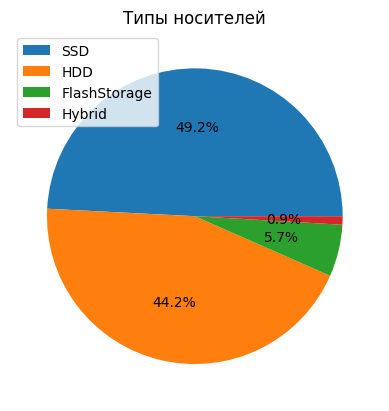

In [28]:
plt.pie(data.values, autopct='%1.1f%%')
plt.legend(data.index)
plt.title('Типы носителей');

2.2 Изучите распределение компаний производителей. Используем bar

In [29]:
data = df['Company'].value_counts()
data

Company
Dell         297
Lenovo       297
HP           274
Asus         158
Acer         103
MSI           54
Toshiba       48
Apple         21
Samsung        9
Razer          7
Mediacom       7
Microsoft      6
Xiaomi         4
Vero           4
Chuwi          3
Google         3
Fujitsu        3
LG             3
Huawei         2
Name: count, dtype: int64

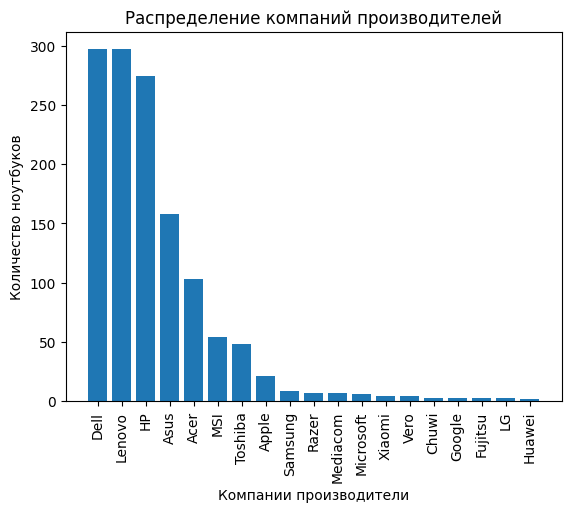

In [37]:
plt.bar(data.index, data.values)
plt.xlabel('Компании производители')
plt.ylabel('Количество ноутбуков')
plt.title('Распределение компаний производителей')
plt.xticks(rotation=90);



2.3 Изучите распределение операционной системы. Используем bar

In [38]:
data = df['OpSys'].value_counts()
data

OpSys
Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         27
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: count, dtype: int64

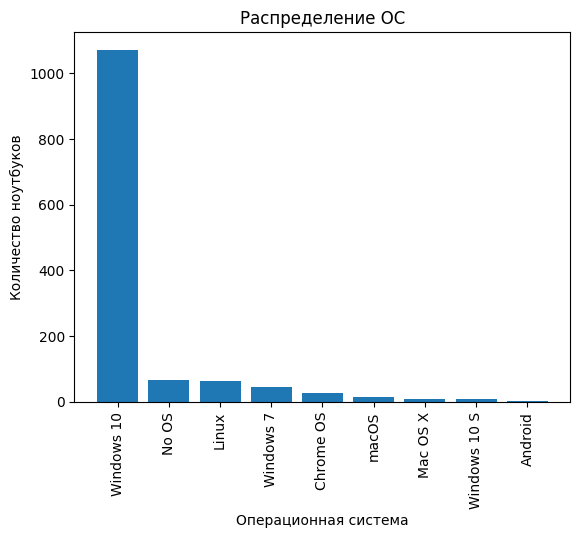

In [39]:
plt.bar(data.index, data.values)
plt.xlabel('Операционная система')
plt.ylabel('Количество ноутбуков')
plt.title('Распределение ОС')
plt.xticks(rotation=90);


2.4 Изучите распределение компаний производителей CPU.  Используем pie

In [40]:
data = df['Cpu_Company'].value_counts()
data

Cpu_Company
Intel      1240
AMD          62
Samsung       1
Name: count, dtype: int64

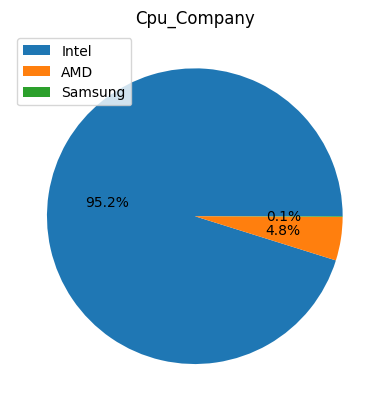

In [41]:
plt.pie(data.values, autopct='%1.1f%%')
plt.legend(data.index)
plt.title('Cpu_Company');

Изучите взаимосвязь компаний производителей ноутбуков и компаний производителей процессоров, используя сложенную или многорядовую столбчатую диаграмму\
Процессоры от Samsung не изучайте

3.1 Постройте график в абсолютных величинах.  Используем bar

In [43]:
data = pd.crosstab(index=df['Company'], columns=df['Cpu_Company'])
data = data.drop(columns=['Samsung']).reset_index()
data

Cpu_Company,Company,AMD,Intel
0,Acer,10,93
1,Apple,0,21
2,Asus,11,147
3,Chuwi,0,3
4,Dell,0,297
5,Fujitsu,0,3
6,Google,0,3
7,HP,25,249
8,Huawei,0,2
9,LG,0,3


In [44]:
import numpy as np

<BarContainer object of 19 artists>

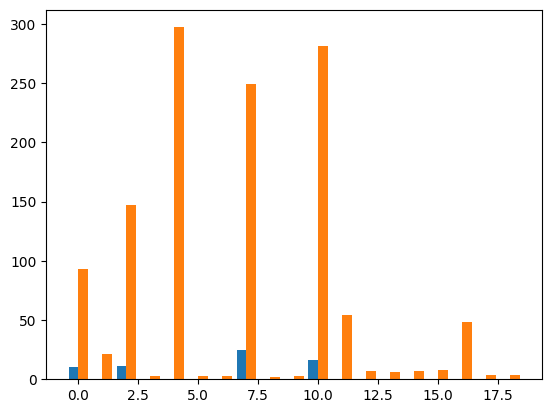

In [45]:
n_ticks = np.arange(len(data['AMD']))
offset = 0.2
w = 0.4
plt.bar(n_ticks - offset, data['AMD'], width=w)
plt.bar(n_ticks + offset, data['Intel'], width=w)

3.2 Постройте график в относительных величинах.  Используем bar

In [49]:
data = pd.crosstab(index=df['Company'], columns=df['Cpu_Company'], normalize='index')
data = data.drop(columns=['Samsung']).reset_index()
data

Cpu_Company,Company,AMD,Intel
0,Acer,0.097087,0.902913
1,Apple,0.000000,1.000000
2,Asus,0.069620,0.930380
3,Chuwi,0.000000,1.000000
4,Dell,0.000000,1.000000
5,Fujitsu,0.000000,1.000000
6,Google,0.000000,1.000000
7,HP,0.091241,0.908759
8,Huawei,0.000000,1.000000
9,LG,0.000000,1.000000


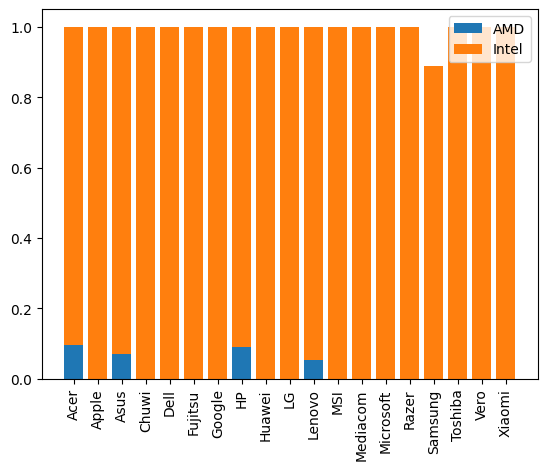

In [57]:
plt.bar(data['Company'], data['AMD'])
plt.bar(data['Company'], data['Intel'], bottom=data['AMD'])
plt.legend(['AMD', 'Intel'])
plt.xticks(rotation = 90);

4.1 Изучите взаимосвязь стоимости ноутбука и компании производителя процессора.  Используем boxplot

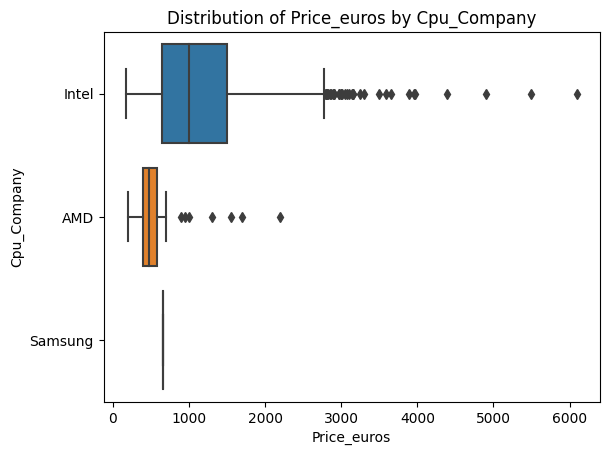

In [58]:
sns.boxplot(x=df['Price_euros'], y=df['Cpu_Company'], whis=1.5);
plt.xlabel('Price_euros')
plt.ylabel('Cpu_Company')
plt.title('Distribution of Price_euros by Cpu_Company');

4.2 Изучите взаимосвязь стоимости ноутбука и типа носителя памяти. Используем boxplot

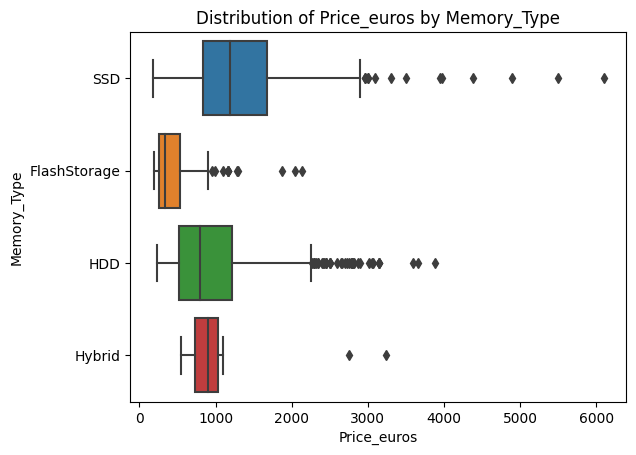

In [59]:
sns.boxplot(x=df['Price_euros'], y=df['Memory_Type'], whis=1.5);
plt.xlabel('Price_euros')
plt.ylabel('Memory_Type')
plt.title('Distribution of Price_euros by Memory_Type');

4.3 Изучите взаимосвязь стоимости ноутбука и кол-ва оперативной памяти. Используем boxplot

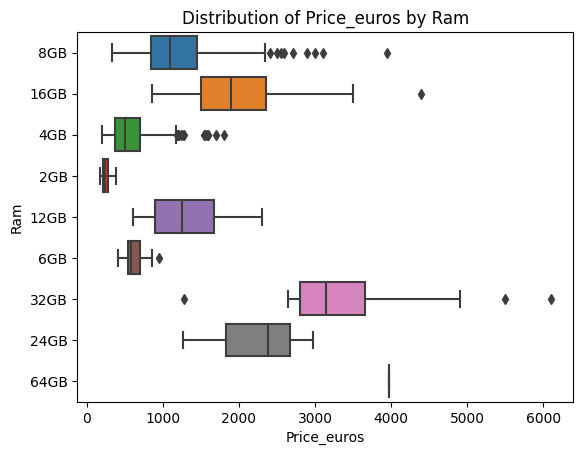

In [60]:
sns.boxplot(x=df['Price_euros'], y=df['Ram'], whis=1.5);
plt.xlabel('Price_euros')
plt.ylabel('Ram')
plt.title('Distribution of Price_euros by Ram');

4.4 Изучите взаимосвязь стоимости ноутбука и компании производителя. Используем boxplot

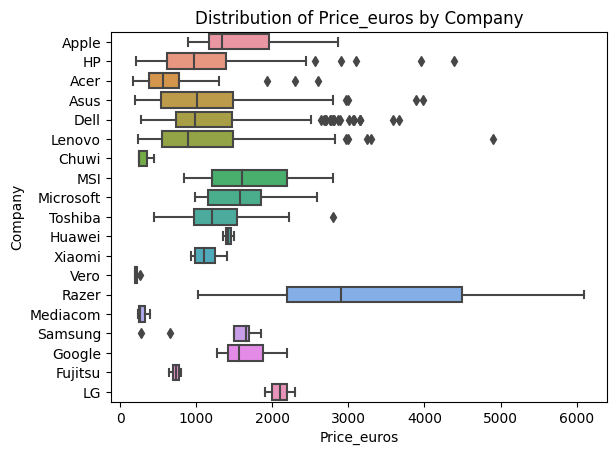

In [61]:
sns.boxplot(x=df['Price_euros'], y=df['Company'], whis=1.5);
plt.xlabel('Price_euros')
plt.ylabel('Company')
plt.title('Distribution of Price_euros by Company');

Постройте матрицу корреляций для таблицы. 
Используем heatmap

In [62]:
df.head()

,Company,Product,TypeName,Inches,Cpu,Ram,Gpu,OpSys,Weight,Price_euros,Cpu_Company,Memory_Amount,Memory_Type
0,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5 2.3GHz,8GB,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,Intel,128,SSD
1,Apple,Macbook Air,Ultrabook,13.3,Intel Core i5 1.8GHz,8GB,Intel HD Graphics 6000,macOS,1.34,898.94,Intel,128,FlashStorage
2,HP,250 G6,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8GB,Intel HD Graphics 620,No OS,1.86,575.00,Intel,256,SSD
3,Apple,MacBook Pro,Ultrabook,15.4,Intel Core i7 2.7GHz,16GB,AMD Radeon Pro 455,macOS,1.83,2537.45,Intel,512,SSD
4,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5 3.1GHz,8GB,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,Intel,256,SSD


In [67]:
df = df[['Inches','Weight','Price_euros','Memory_Amount']]
df

,Inches,Weight,Price_euros,Memory_Amount
0,13.3,1.37,1339.69,128
1,13.3,1.34,898.94,128
2,15.6,1.86,575.00,256
3,15.4,1.83,2537.45,512
4,13.3,1.37,1803.60,256
...,...,...,...,...
1298,14.0,1.80,638.00,128
1299,13.3,1.30,1499.00,512
1300,14.0,1.50,229.00,64
1301,15.6,2.19,764.00,1024


In [70]:
corr_matrix = df.corr()
corr_matrix

,Inches,Weight,Price_euros,Memory_Amount
Inches,1.000000,0.827631,0.068197,0.269718
Weight,0.827631,1.000000,0.210370,0.180557
Price_euros,0.068197,0.210370,1.000000,-0.125363
Memory_Amount,0.269718,0.180557,-0.125363,1.000000


<Axes: >

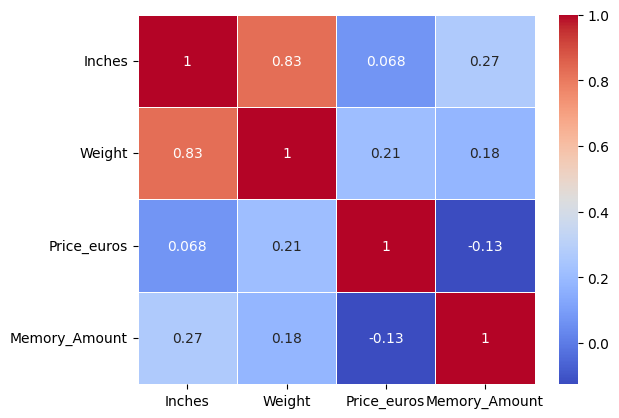

In [71]:
sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap='coolwarm')